In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

from feature_engineering import transformation

### Трансформация признаков

#### Зачем важна трансформация признаков?


Если модель машинного обучения предполагает **линейную зависимость** между предикторами X и результатом Y, когда такой **линейной связи нет**, модель будет демонстрировать **плохой результат**. В таких случаях лучше **попробовать другую модель машинного обучения**, которая не делает такого предположения.

Если **линейной связи нет**, и нам приходится использовать **линейные/логистические регрессионные модели**, **математическое преобразование данных ** может помочь создать связь, хотя это не гарантирует лучшего результата.

**Распределение переменных**

**Предположения линейной регрессии**
Линейная регрессия имеет следующие предположения относительно предикторов X:
- **Линейная зависимость с результатом Y**
- **Многомерная нормальность**
- **Отсутствие или слабая мультиколлинеарность**
- **Гомоскедастичность**

**Предположение о нормальности** означает, что каждая переменная X должна следовать **нормальному распределению Гаусса**.

**Гомоскедастичность**, также известная как **однородность дисперсии**, описывает ситуацию, при которой ошибка (то есть "шум" или случайное отклонение в отношении между независимыми переменными (X) и зависимой переменной (Y)) одинакова для всех значений независимых переменных.

**Нарушения предположений о гомоскедастичности и/или нормальности** (при условии, что распределение данных гомоскедастично или гауссово, когда на самом деле это не так) могут привести к **плохой производительности модели**.

Остальные модели машинного обучения, включая **нейронные сети, методы опорных векторов, методы на основе деревьев и PCA**, не делают каких-либо предположений относительно распределения независимых переменных. Тем не менее, во многих случаях **производительность модели может выиграть от "приведения к распределению Гаусса"**.

Почему **модели могут выиграть от "подобия к распределению Гаусса"**? В переменных с нормальным распределением наблюдения X, доступные для прогнозирования Y, изменяются в **бОльшем диапазоне значений**, а не сжимаются.

В вышеуказанных ситуациях **преобразование исходной переменной** может помочь сделать переменную более **похожей на распределение Гаусса**.


## Загрузка данных

In [5]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./data/titanic.csv', usecols=use_cols)


In [6]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[["Fare"]], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 1), (268, 1))

<AxesSubplot:>

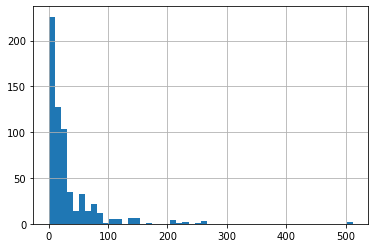

In [8]:
X_train['Fare'].hist(bins=50)

## Лог преобразование

Лог преобразование полезно, если его применяют к скошенному распределению. В скошенных распределениях данных, редкие большие значения формируют длинный хвост, а частые группируются вместе. Логарифм позволяет группировать данные и приводить их к нормальному распределению.

График Q-Q для переменной Fare_log


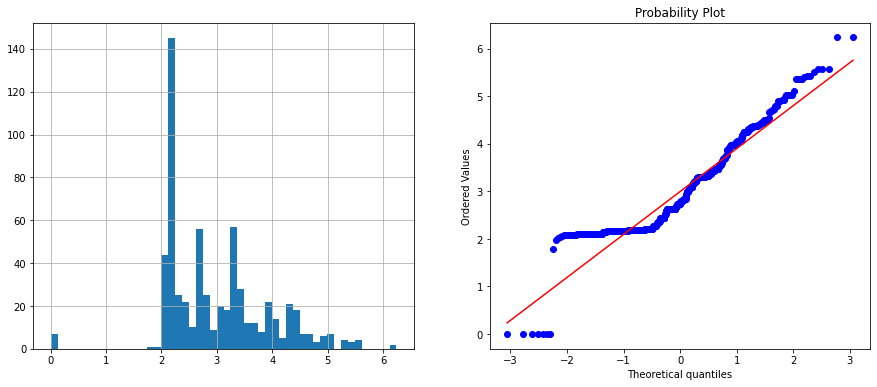

        Fare  Fare_log
857  26.5500  3.316003
52   76.7292  4.353231
386  46.9000  3.869116
124  77.2875  4.360388
578  14.4583  2.738146
549  36.7500  3.630985


In [9]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.log_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

Мы можем использовать график Q-Q (график квантиль-квантиль) для проверки, является ли переменная нормально распределенной (линия под углом 45 градусов отображает значения на теоретические квантили) после преобразования.

## Обратное преобразование

Схоже с лог. преобразованием.

График Q-Q для переменной Fare_reciprocal


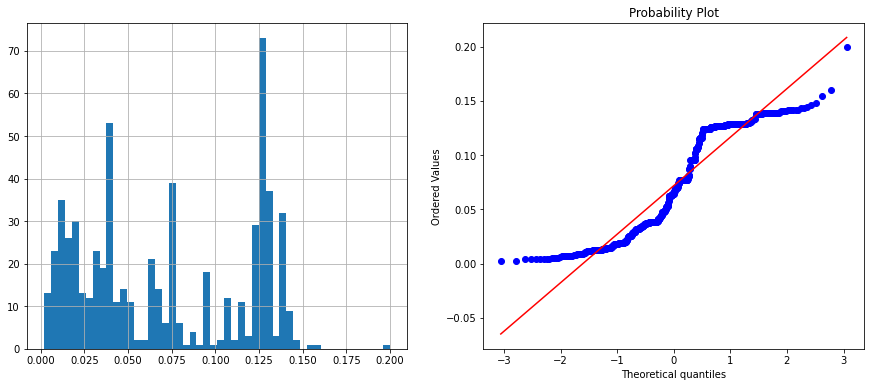

        Fare  Fare_reciprocal
857  26.5500         0.037665
52   76.7292         0.013033
386  46.9000         0.021322
124  77.2875         0.012939
578  14.4583         0.069164
549  36.7500         0.027211


In [10]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.Fare!=0] # x не должно быть 0
#X_train_copy[X_train_copy.Fare==0]
X_train_copy = transformation.reciprocal_transform(data=X_train_copy,cols=['Fare'])
print(X_train_copy.head(6))

## Преобразование с корнем

График Q-Q для переменной Fare_square_root


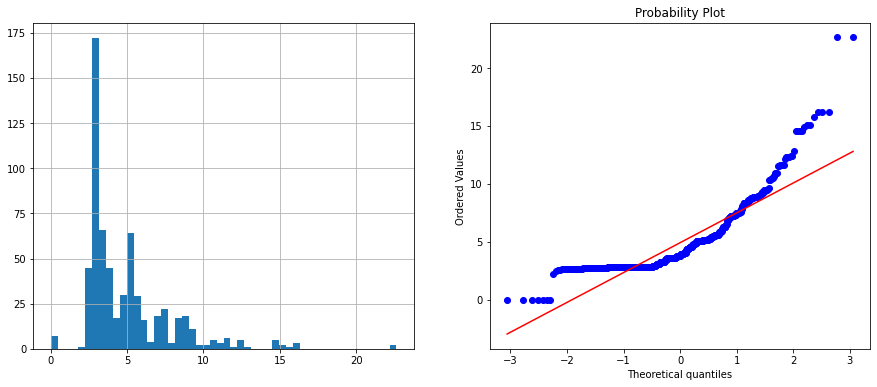

        Fare  Fare_square_root
857  26.5500          5.152669
52   76.7292          8.759521
386  46.9000          6.848357
124  77.2875          8.791331
578  14.4583          3.802407
549  36.7500          6.062178


In [11]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.square_root_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

## Экспоненциальное преобразование

График Q-Q для переменной Fare_exp


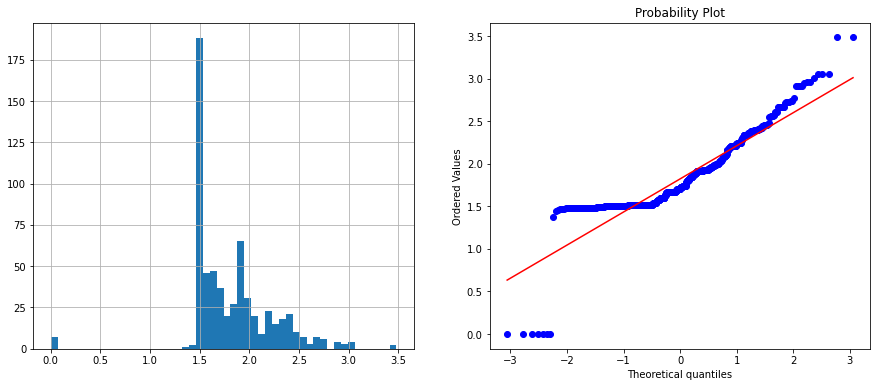

        Fare  Fare_exp
857  26.5500  1.926695
52   76.7292  2.382276
386  46.9000  2.158910
124  77.2875  2.385733
578  14.4583  1.706174
549  36.7500  2.056134


In [12]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.exp_transform(data=X_train,cols=['Fare'],coef=0.2)
print(X_train_copy.head(6))

## Box-cox преобразование

Эта функция имеет предварительное условие: числовые значения, которые требуется преобразовать, должны быть положительными (аналогично ожиданиям при логарифмическом преобразовании). Если они отрицательны, то смещение с использованием постоянного значения может помочь.

$
f(x, \lambda) =
\begin{cases} 
\frac{{x^\lambda - 1}}{\lambda}, & \text{if } \lambda > 0 \\
\log(x), & \text{if } \lambda = 0
\end{cases}
$

In [13]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_boxcox'] = pt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

        Fare  Fare_boxcox
857  26.5500     0.398696
52   76.7292     1.401774
386  46.9000     0.950718
124  77.2875     1.408228
578  14.4583    -0.222897
549  36.7500     0.718007


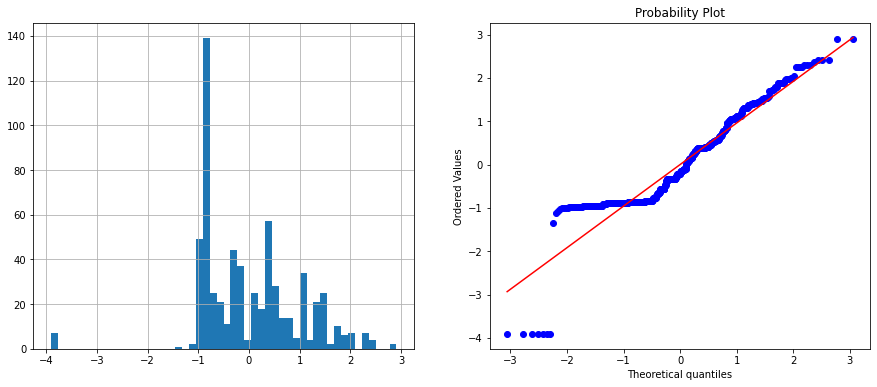

In [14]:
transformation.diagnostic_plots(X_train_copy,'Fare_boxcox')

## Квантильное преобразование

Преобразование применяется к каждому признаку независимо. Сначала используется оценка кумулятивной функции распределения признака для отображения исходных значений на равномерное распределение. Затем полученные значения отображаются на желаемое целевое распределение с использованием соответствующей квантильной функции. Значения признаков новых/невидимых данных, которые находятся ниже или выше подходящего диапазона, будут отображены на границы целевого распределения. Обратите внимание, что это преобразование является нелинейным. Оно может исказить линейные корреляции между переменными, измеренными в одном и том же масштабе, но делает переменные, измеренные в разных масштабах, более непосредственно сравнимыми.


In [15]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_qt'] = qt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

        Fare   Fare_qt
857  26.5500  0.470128
52   76.7292  1.269732
386  46.9000  0.841047
124  77.2875  1.287991
578  14.4583 -0.022167
549  36.7500  0.744471


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (623). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


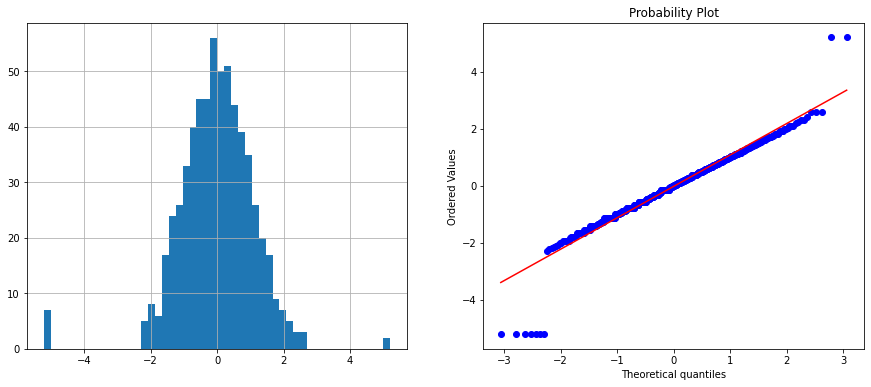

In [16]:
transformation.diagnostic_plots(X_train_copy,'Fare_qt')

Примеры преобразования из различных распределений в нормальное с помощью разных трансформаций:

![data-transformation-example](https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png)